In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

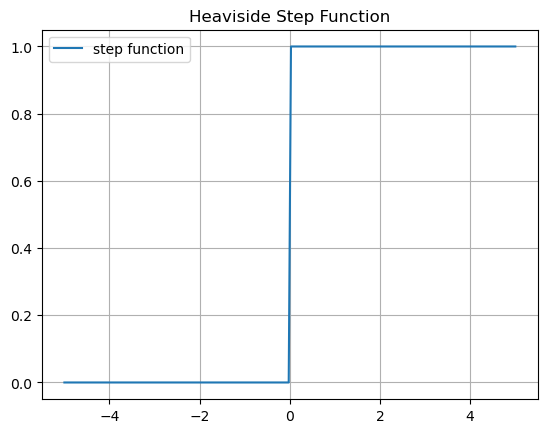

In [5]:
#Step Function

def heaviside(z):
    return (z >= 0).astype(int)

#Visualize
z = np.linspace(-5, 5, 200)
plt.plot(z, heaviside(z), label='step function')
plt.title("Heaviside Step Function")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
#Perceptron Implementation

class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.1):
        self.weights = np.random.randn(n_inputs+1) # +1 for bias
        self.lr = learning_rate

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return heaviside(X_b @ self.weights)
    
    def train(self, X, y, n_epochs=10):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        for epoch in range(n_epochs):
            for xi , target in zip(X_b, y):
                y_pred = heaviside(np.dot(xi, self.weights))
                self.weights += self.lr*(target-y_pred)*xi #Widrow Hoff rule


In [14]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

percep = Perceptron(n_inputs=2)
percep.train(X,y)
percep.predict(X)

array([0, 0, 0, 1])

In [15]:
# XOR_GATE (perceptron fails)
percep_xor = Perceptron(n_inputs=2)
y_xor = np.array([0, 1, 1, 0])
percep_xor.train(X, y_xor)
percep_xor.predict(X)

array([1, 1, 1, 0])